In [1]:
# import torch

In [ ]:
# real_path = "/home/damitha/PycharmProjects/GraCoMo/real_data/"
# dataset = "cora_full"
# n = 19793 

# src_nodes = torch.load(real_path + dataset + "_src_nodes.pt")
# dst_nodes = torch.load(real_path + dataset + "_dst_nodes.pt")

In [2]:
import numpy as np
3*np.ones((2,3))

array([[3., 3., 3.],
       [3., 3., 3.]])

In [1]:
import pandas as pd
import numpy as np
import subprocess
import os

In [2]:
min_nodes = 1000
max_nodes = 100000

min_mul_edge = 10
max_mul_edge = 1000

graphs_at_config = [
    ["0.45", "0.22", "0.22"],
    ["0.7", "0.1", "0.1"],
    ["0.25", "0.25", "0.25"],
    ["0.40", "0.40", "0.1"],
    ["0.3", "0.3", "0.3"]
]

base_csv_path = r'/home/damitha/PycharmProjects/GraCoMo/csv_data/data_'
base_file_path = r'/home/damitha/PycharmProjects/GraCoMo/data_save2/out'
base_mtx_path = r'/home/damitha/PycharmProjects/GraCoMo/data_save_mtx/out_'

In [3]:
# for x in graphs_at_config:
#     nodes = min_nodes
#     while nodes <= max_nodes:
#         mul = min_mul_edge
#         while mul <= max_mul_edge:
#             edges = nodes * mul
#             s0 = str(nodes) + '_' + str(edges) + '_' + x[0] + '_' + x[1] + '_' + x[2]
#             s1 = s0 + '.el' 
#             s = base_file_path + s1
#             exi = os.path.exists(s)
            
#             if (exi):
#                 f = open(base_mtx_path + s0 + '.mtx', "w")
#                 print('Writing to', base_mtx_path + s0 + '.mtx', "w")
#                 f.write('%%MatrixMarket matrix coordinate real general\n')
#                 f.write(str(nodes) + ' ' + str(nodes) + ' ' + str(edges) + ' ' + '\n')
#                 with open(s, mode='r') as file:
#                     for ln in file:
#                         ln0 = list(map(int, ln.split()))
#                         f.write(str(ln0[0] + 1) + ' ' + str(ln0[1] + 1) + '\n')
#                 f.close()
# #             break
#             mul *= 10
# #         break    
#         nodes*=10
# #     break

In [6]:
approx_path = r'/home/damitha/CLionProjects/SparseAcc/sw_lib/cmake-build-release/tests/approx_test'

In [7]:
map_feats = {}

for x in graphs_at_config:
    nodes = min_nodes
    while nodes <= max_nodes:
        mul = min_mul_edge
        while mul <= max_mul_edge:
            edges = nodes * mul
            s0 = str(nodes) + '_' + str(edges) + '_' + x[0] + '_' + x[1] + '_' + x[2]
            s1 = s0 + '.mtx' 
            s = base_mtx_path + s1
            exi = os.path.exists(s)
            
            if (exi):
                cmd = [approx_path, s]
                res4 = subprocess.Popen(cmd, stdout=subprocess.PIPE)
                lline = '';
                for line in iter(res4.stdout.readline, b''):
                    lline = line.rstrip().decode('utf-8')
#                 print(line)
                print(list(map(float, lline.split() + [x[0], x[1], x[2]])), '\t\t\t', s0)
                map_feats[s0] = list(map(float, lline.split() + [x[0], x[1], x[2]]))
#             break
            mul *= 10
#         break    
        nodes*=10
#     break

[0.0, 191.0, 16.928, 6.09475, 0.980714, 3.46996, 0.45, 0.22, 0.22] 			 1000_10000_0.45_0.22_0.22
[0.0, 1747.0, 167.437, 5.72907, 0.921871, 5.06601, 0.45, 0.22, 0.22] 			 1000_100000_0.45_0.22_0.22
[0.0, 322.0, 21.0083, 8.41121, 0.987556, 3.52353, 0.45, 0.22, 0.22] 			 10000_100000_0.45_0.22_0.22
[0.0, 3695.0, 209.879, 7.87838, 0.924997, 5.64639, 0.45, 0.22, 0.22] 			 10000_1000000_0.45_0.22_0.22
[0.0, 36326.0, 2090.54, 7.82755, 0.91903, 7.29188, 0.45, 0.22, 0.22] 			 10000_10000000_0.45_0.22_0.22
[0.0, 1122.0, 48.1022, 8.77252, 0.952465, 4.22565, 0.45, 0.22, 0.22] 			 100000_1000000_0.45_0.22_0.22
[0.0, 11104.0, 474.692, 8.50303, 0.923205, 6.23026, 0.45, 0.22, 0.22] 			 100000_10000000_0.45_0.22_0.22
[0.0, 110422.0, 4766.73, 8.47222, 0.919859, 7.79085, 0.45, 0.22, 0.22] 			 100000_100000000_0.45_0.22_0.22
[0.0, 1031.0, 58.8766, 4.95922, 0.797993, 2.89836, 0.7, 0.1, 0.1] 			 1000_10000_0.7_0.1_0.1
[0.0, 10633.0, 606.452, 4.55205, 0.732477, 4.3838, 0.7, 0.1, 0.1] 			 1000_100000_0.7_0.1_

In [8]:
all_csvs = pd.DataFrame()

for x in graphs_at_config:
    nodes = min_nodes
    while nodes <= max_nodes:
        mul = min_mul_edge
        while mul <= max_mul_edge:
            edges = nodes * mul
            s0 = str(nodes) + '_' + str(edges) + '_' + x[0] + '_' + x[1] + '_' + x[2]
            s = base_csv_path + s0
            print(s)
            exi = os.path.exists(s)
            
            if (exi):
                df = pd.read_csv(s)
                df['min_deg'] = map_feats[s0][0]
                df['max_deg'] = map_feats[s0][1]
                df['std_deg'] = map_feats[s0][2]
                df['e_entr'] = map_feats[s0][3]
                df['norm_e_entr'] = map_feats[s0][4]
                df['d_entr'] = map_feats[s0][5]
                df['a'] = map_feats[s0][6]
                df['b'] = map_feats[s0][7]
                df['c'] = map_feats[s0][8]
                all_csvs = all_csvs.append(df)
#             break
            mul *= 10
#         break    
        nodes*=10
#     break

/home/damitha/PycharmProjects/GraCoMo/csv_data/data_1000_10000_0.45_0.22_0.22
/home/damitha/PycharmProjects/GraCoMo/csv_data/data_1000_100000_0.45_0.22_0.22
/home/damitha/PycharmProjects/GraCoMo/csv_data/data_1000_1000000_0.45_0.22_0.22
/home/damitha/PycharmProjects/GraCoMo/csv_data/data_10000_100000_0.45_0.22_0.22
/home/damitha/PycharmProjects/GraCoMo/csv_data/data_10000_1000000_0.45_0.22_0.22
/home/damitha/PycharmProjects/GraCoMo/csv_data/data_10000_10000000_0.45_0.22_0.22
/home/damitha/PycharmProjects/GraCoMo/csv_data/data_100000_1000000_0.45_0.22_0.22
/home/damitha/PycharmProjects/GraCoMo/csv_data/data_100000_10000000_0.45_0.22_0.22
/home/damitha/PycharmProjects/GraCoMo/csv_data/data_100000_100000000_0.45_0.22_0.22
/home/damitha/PycharmProjects/GraCoMo/csv_data/data_1000_10000_0.7_0.1_0.1
/home/damitha/PycharmProjects/GraCoMo/csv_data/data_1000_100000_0.7_0.1_0.1
/home/damitha/PycharmProjects/GraCoMo/csv_data/data_1000_1000000_0.7_0.1_0.1
/home/damitha/PycharmProjects/GraCoMo/csv_d

In [9]:
all_csvs1 = all_csvs

In [10]:
print(all_csvs1)

      1_direction  2_parallel  2_grain  3_densevert  3_vertset  3_direction  \
0               0           0        0            0          1            4   
1               0           1        8            1          1            4   
2               1           3        1            1          1            4   
3               1           3        1            1          1            5   
4               1           3        1            1          2            0   
...           ...         ...      ...          ...        ...          ...   
1483            1           3        1            1          0            5   
1484            1           3        1            1          1            0   
1485            1           3        1            1          1            1   
1486            1           3        1            1          1            2   
1487            1           3        1            1          1            3   

       nodes      edges        rt                  

In [11]:
all_csvs1 = all_csvs1.drop(columns=['name'])

all_csvs1 = all_csvs1.drop(columns=['a'])
all_csvs1 = all_csvs1.drop(columns=['b'])
all_csvs1 = all_csvs1.drop(columns=['c'])
# all_csvs1 = all_csvs1.drop(columns=['min'])
# all_csvs1 = all_csvs1.drop(columns=['max'])
# all_csvs1 = all_csvs1.drop(columns=['std'])
# all_csvs1 = all_csvs1.drop(columns=['e_entr'])
all_csvs1 = all_csvs1.drop(columns=['norm_e_entr'])
# all_csvs1 = all_csvs1.drop(columns=['d_entr'])
# all_csvs1 = all_csvs1.drop(columns=['nodes'])
# all_csvs1 = all_csvs1.drop(columns=['edges'])

In [12]:
df1 = all_csvs1.pop('rt')*1000
all_csvs1['rt'] = df1

In [13]:
print(all_csvs1)

      1_direction  2_parallel  2_grain  3_densevert  3_vertset  3_direction  \
0               0           0        0            0          1            4   
1               0           1        8            1          1            4   
2               1           3        1            1          1            4   
3               1           3        1            1          1            5   
4               1           3        1            1          2            0   
...           ...         ...      ...          ...        ...          ...   
1483            1           3        1            1          0            5   
1484            1           3        1            1          1            0   
1485            1           3        1            1          1            1   
1486            1           3        1            1          1            2   
1487            1           3        1            1          1            3   

       nodes      edges  min_deg  max_deg   std_deg

In [14]:
all_csvs1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59520 entries, 0 to 1487
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   1_direction  59520 non-null  int64  
 1   2_parallel   59520 non-null  int64  
 2   2_grain      59520 non-null  int64  
 3   3_densevert  59520 non-null  int64  
 4   3_vertset    59520 non-null  int64  
 5   3_direction  59520 non-null  int64  
 6   nodes        59520 non-null  int64  
 7   edges        59520 non-null  int64  
 8   min_deg      59520 non-null  float64
 9   max_deg      59520 non-null  float64
 10  std_deg      59520 non-null  float64
 11  e_entr       59520 non-null  float64
 12  d_entr       59520 non-null  float64
 13  rt           59520 non-null  float64
dtypes: float64(6), int64(8)
memory usage: 6.8 MB


In [15]:
all_csvs1.describe()

,1_direction,2_parallel,2_grain,3_densevert,3_vertset,3_direction,nodes,edges,min_deg,max_deg,std_deg,e_entr,d_entr,rt
count,59520.000000,59520.000000,59520.000000,59520.000000,59520.000000,59520.000000,59520.000000,5.952000e+04,59520.0,5.952000e+04,59520.000000,59520.000000,59520.000000,59520.000000
mean,1.354839,1.875000,64.687500,0.548387,1.000000,3.354839,41500.000000,1.527625e+07,0.0,8.214250e+04,1531.983261,7.785869,4.679049,11.557103
std,1.064036,0.927033,94.508544,0.497657,0.816503,1.380717,45448.154013,3.227857e+07,0.0,3.677647e+05,5510.650317,1.391402,1.516835,30.817125
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1000.000000,1.000000e+04,0.0,2.600000e+01,3.458500,4.552050,2.567450,0.006900
25%,0.000000,1.000000,6.250000,0.000000,0.000000,2.000000,7750.000000,1.000000e+05,0.0,1.840000e+02,19.078500,6.592795,3.460527,0.150300
50%,1.000000,2.000000,16.000000,1.000000,1.000000,4.000000,10000.000000,1.000000e+06,0.0,1.076500e+03,84.366050,8.357675,4.418730,1.072150
75%,2.000000,3.000000,64.000000,1.000000,2.000000,5.000000,100000.000000,1.000000e+07,0.0,9.256750e+03,384.479000,8.926993,5.723113,6.441225
max,3.000000,3.000000,256.000000,1.000000,2.000000,5.000000,100000.000000,1.000000e+08,0.0,2.326988e+06,34313.000000,9.936790,7.790850,390.756700


In [18]:

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [19]:
# model = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
# model = XGBRegressor()

In [20]:
data = all_csvs1
X, y = data.iloc[:, :-1], data.iloc[:, -1]

In [24]:
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(60, kernel_initializer='normal', activation='relu'))
    model.add(Dense(5, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_logarithmic_error', optimizer='adam')
    return model
# evaluate model
estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=6, verbose=1)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, X, y, cv=kfold)
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Epoch 1/100
10714/10714 [==============================] - 23s 2ms/step - loss: 20968.3516
Epoch 2/100
10714/10714 [==============================] - 31s 3ms/step - loss: 1086.3901
Epoch 3/100
10714/10714 [==============================] - 30s 3ms/step - loss: 1019.0301
Epoch 4/100
10714/10714 [==============================] - 31s 3ms/step - loss: 1063.0504
Epoch 5/100
10714/10714 [==============================] - 28s 3ms/step - loss: 1027.8485
Epoch 6/100
 1865/10714 [====>.........................] - ETA: 26s - loss: 1036.8084

KeyboardInterrupt: 

In [ ]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [150]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [151]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 1, learning_rate = 0.3,
                max_depth = 15, alpha = 20, n_estimators = 100)

In [152]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

In [153]:
y_test

1367    17.0611
93       0.5026
188      0.3411
851      1.4799
57       0.8953
         ...   
570      0.3616
939      0.8579
604      2.2380
200      0.0284
719     33.4909
Name: rt, Length: 11904, dtype: float64

In [154]:
pred_df = pd.DataFrame(y_test)
pred_df['pred'] = preds

In [155]:
p1 = pred_df.sort_values(by=['rt']).reset_index(drop=True)
p1

,rt,pred
0,0.0071,0.000528
1,0.0071,0.001868
2,0.0073,-0.000961
3,0.0073,0.002052
4,0.0074,0.003541
...,...,...
11899,231.5513,202.312103
11900,254.1140,219.494171
11901,278.7549,282.181854
11902,309.3920,251.984985


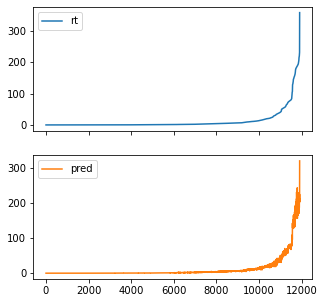

In [156]:
ax = p1.plot.line(subplots=True)

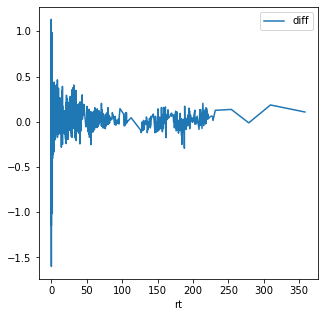

In [166]:
p2 = p1
p2['diff'] = (p1['rt']-p1['pred'])/p1['rt']
p2 = p2.drop(columns=['pred'])
ax2 = p2.plot.line(x='rt', y='diff', subplots=True)

In [162]:
p2

,diff
0,0.925661
1,0.736836
2,1.131691
3,0.718888
4,0.521449
...,...
11899,0.126275
11900,0.136237
11901,-0.012294
11902,0.185548


In [164]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 2.336979


In [2]:
preds = xg_reg.predict(X_train)
rmse = np.sqrt(mean_squared_error(y_train, preds))
print("RMSE: %f" % (rmse))

NameError: name 'xg_reg' is not defined

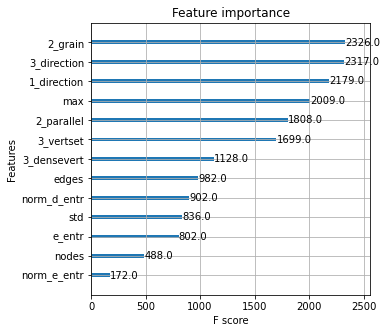

In [163]:
import matplotlib.pyplot as plt
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [44]:
params = {"objective":"reg:squarederror",'colsample_bytree': 0.5,'learning_rate': 0.3,
                'max_depth': 15, 'alpha': 20}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

In [45]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,31.226482,0.146232,31.227226,0.296705
1,28.767111,0.703135,28.759592,0.274407
2,26.541520,0.566732,26.536295,0.504234
3,24.925292,0.567148,24.930500,0.720729
4,23.329418,0.181434,23.333975,0.260645


In [32]:
model.fit(X,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=16,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)